In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
os.chdir(r"D:\Training\CareerEra\Batch-Masters\KNN\Mobile Price Range Prediction\Dataset")

In [3]:
os.listdir()

['CV_results.csv',
 'knearest_neighbours_mobile_price.joblib',
 'mobile_price.csv',
 'New folder',
 'NewMobile.xlsx']

In [4]:
mobile=pd.read_csv("mobile_price.csv")

In [5]:
mobile.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [6]:
mobile.shape

(2000, 21)

In [7]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### EDA 

In [8]:
def univariate_num(data,x, bxplot=True, hist_graph=True):
    minn=data[x].min()
    maxx=data[x].max()
    stdd=data[x].std()
    meann=data[x].mean()
    q1=data[x].quantile(.25)
    q2=data[x].quantile(.5)
    q3=data[x].quantile(.75)
    iqr=q3-q1
    skewness=data[x].skew()
    
    if bxplot==True:
        sns.boxplot(y=data[x])
        plt.show()
    if hist_graph==True:
        sns.histplot(data=data, x=x)
        plt.show()
    result={"missing_value":data[x].isnull().sum(), 
           "min":minn,
           "max":maxx,
           "std":round(stdd, 2),
           "mean":round(meann, 2),
           "q1":round(q1,2),"q2":round(q2, 2), 
            "q3":round(q3,2), "iqr":round(iqr,2),"skewness":round(skewness,2)}
    return result

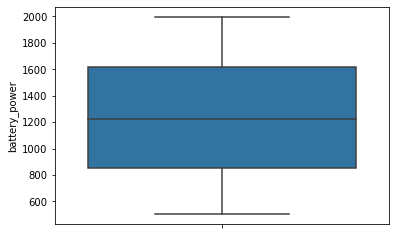

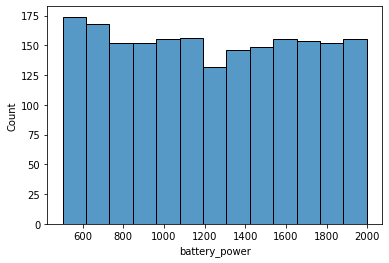

{'missing_value': 0,
 'min': 501,
 'max': 1998,
 'std': 439.42,
 'mean': 1238.52,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'iqr': 763.5,
 'skewness': 0.03}

In [9]:
univariate_num(data=mobile, x="battery_power")

In [10]:
# mobile.describe().T

### Note : `Explore the data and write your comments`

##### model development 

In [11]:
y=mobile["price_range"]
x=mobile.drop(columns=["price_range"])

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2,random_state=88)

In [13]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [17]:
# help(knn) 

In [14]:
print("Train Score", knn.score(x_train, y_train))
print("Test Score", knn.score(x_test, y_test))

Train Score 0.95375
Test Score 0.905


### parameter tuning

In [16]:
knn=KNeighborsClassifier(n_neighbors=19, p=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19, p=4)

In [17]:
print("Train Score", knn.score(x_train, y_train))
print("Test Score", knn.score(x_test, y_test))

Train Score 0.936875
Test Score 0.9125


In [18]:
x_train.shape

(1600, 20)

In [19]:
parameter={"n_neighbors":[3,5,7,9,11,13,15,17,19,21,23,25],
          "p":[1,2,3,4,5]}

knn_search=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_search, param_grid=parameter, cv=10, n_jobs=1, verbose=2, refit=True)
knn_grid.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.1s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=1; total time=   0.0s
[CV] END .................................n_neighbors=3, p=2; total time=   0.1s
[CV] END .................................n_ne

[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=1; total time=   0.0s
[CV] END .................................n_neighbors=7, p=2; total time=   0.1s
[CV] END .................................n_neighbors=7, p=2; total time=   0.1s
[CV] END .................................n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................

[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=1; total time=   0.0s
[CV] END ................................n_neighbors=11, p=2; total time=   0.0s
[CV] END ................................n_neighbors=11, p=2; total time=   0.0s
[CV] END ................................n_neighbors=11, p=2; total time=   0.0s
[CV] END ................................n_neighbors=11, p=2; total time=   0.1s
[CV] END ................................n_neighbors=11, p=2; total time=   0.0s
[CV] END ...................

[CV] END ................................n_neighbors=15, p=1; total time=   0.0s
[CV] END ................................n_neighbors=15, p=1; total time=   0.0s
[CV] END ................................n_neighbors=15, p=1; total time=   0.0s
[CV] END ................................n_neighbors=15, p=1; total time=   0.0s
[CV] END ................................n_neighbors=15, p=2; total time=   0.0s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ................................n_neighbors=15, p=2; total time=   0.1s
[CV] END ...................

[CV] END ................................n_neighbors=19, p=1; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=2; total time=   0.1s
[CV] END ................................n_neighbors=19, p=3; total time=   0.1s
[CV] END ...................

[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=2; total time=   0.1s
[CV] END ................................n_neighbors=23, p=3; total time=   0.1s
[CV] END ................................n_neighbors=23, p=3; total time=   0.1s
[CV] END ................................n_neighbors=23, p=3; total time=   0.1s
[CV] END ................................n_neighbors=23, p=3; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25],
                         'p': [1, 2, 3, 4, 5]},
             verbose=2)

In [53]:
pd.DataFrame(knn_grid.cv_results_).to_csv("CV_results.csv")

In [20]:
os.getcwd()

'D:\\Training\\CareerEra\\Batch-Masters\\KNN\\Mobile Price Range Prediction\\Dataset'

In [21]:
knn_grid.best_score_

0.930625

In [22]:
knn_grid.best_params_

{'n_neighbors': 13, 'p': 4}

In [23]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13, p=4)

In [24]:
best_knn=KNeighborsClassifier(n_neighbors=13, p=4)
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13, p=4)

In [25]:
print("Train Score", best_knn.score(x_train, y_train))
print("Test Score", best_knn.score(x_test, y_test))

Train Score 0.945
Test Score 0.915


#### Evaluation of model

In [26]:
pred_train=best_knn.predict(x_train)
pred_test=best_knn.predict(x_test)

In [27]:
pred_train

array([3, 0, 0, ..., 3, 1, 1], dtype=int64)

In [28]:
y_train

231     3
1016    0
1035    0
1490    1
834     3
       ..
613     0
916     0
362     3
433     1
288     1
Name: price_range, Length: 1600, dtype: int64

In [29]:
pd.DataFrame(best_knn.predict_proba(x_train), columns=["prob0", "prob1", "prob2", "prob3"])

,prob0,prob1,prob2,prob3
0,0.000000,0.000000,0.000000,1.000000
1,0.615385,0.384615,0.000000,0.000000
2,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.846154,0.153846,0.000000
4,0.000000,0.000000,0.153846,0.846154
...,...,...,...,...
1595,0.692308,0.307692,0.000000,0.000000
1596,1.000000,0.000000,0.000000,0.000000
1597,0.000000,0.000000,0.000000,1.000000
1598,0.384615,0.615385,0.000000,0.000000


In [30]:
pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), 
             columns=["pred0","pred1", "pred2","pred3"],
             index=["act0", "act1", "act2","act3"]) 

,pred0,pred1,pred2,pred3
act0,391,9,0,0
act1,15,375,9,0
act2,0,22,371,11
act3,0,0,22,375


In [31]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       400
           1       0.92      0.94      0.93       399
           2       0.92      0.92      0.92       404
           3       0.97      0.94      0.96       397

    accuracy                           0.94      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.94      0.95      1600



In [64]:
(.98+.94+.92+.94)/4  # - Macro avg Recall

0.945

In [66]:
(.98*400+.94*399+.92*404+.94*397)/ (400+399+404+397)  # Weighted avg Recall

0.9449500000000001

In [32]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       0.92      0.89      0.90       101
           2       0.85      0.89      0.87        96
           3       0.95      0.90      0.93       103

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [60]:
# we can not create ROC, AUC for multiclass Problem 

In [33]:
new=pd.read_excel("NewMobile.xlsx")

In [34]:
best_knn.predict(new)

array([1, 3, 1, 0], dtype=int64)

In [35]:
new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,2000,1,2.7,1,1,1,8,0.7,160,4,2,25,768,3000,10,8,12,1,1,1
2,1000,0,1.4,1,0,0,4,0.4,200,2,3,14,400,2400,8,3,20,1,0,1
3,500,1,2.0,0,0,0,4,0.6,200,2,0,10,300,1200,9,3,14,0,0,0


In [36]:
import joblib as jbl # pickeling the model

In [37]:
jbl.dump(best_knn, "knearest_neighbours_mobile_price.joblib")

['knearest_neighbours_mobile_price.joblib']

In [38]:
os.getcwd()

'D:\\Training\\CareerEra\\Batch-Masters\\KNN\\Mobile Price Range Prediction\\Dataset'